# Quickstart

## Example: The Cliff Walking

Let's solve the famous
[Cliff Walking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py)
problem with tabular Q-Learning and SARSA [@sutton_barto_2018].

Define the environment:

In [1]:
from gym.envs.toy_text import CliffWalkingEnv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

from yarllib.helpers.history import History
from yarllib.policies import EpsGreedyPolicy


env = CliffWalkingEnv()

def print_summary(history: History):
    print("Training statistics:")
    print(f"Number of episodes: {history.nb_episodes}")
    print(f"Average total reward: {history.total_rewards.mean()}")
    print(f"Average number of steps: {history.lengths.mean()}")
    print(f"Average total reward (last 50 episodes): {history.total_rewards[:-50].mean()}")
    print(f"Average number of steps (last 50 episodes): {history.lengths[:-50].mean()}")


First, let's define the parameters, common both to
Q-Learning and SARSA:

In [13]:
nb_steps = 30000
alpha = 0.1
gamma = 0.99
seed = 42
epsilon = 0.1
policy = EpsGreedyPolicy(epsilon)
params = dict(
    env=env,
    nb_steps=nb_steps,
    policy=policy,
    seed=seed
)


Define the Q-Learning agent:

In [14]:
from yarllib.models.tabular import TabularQLearning

qlearning = TabularQLearning(env.observation_space, env.action_space).agent()

print(f"Table dimensions: {qlearning.model.q.shape}")

Table dimensions: (48, 4)


Run for 30000 steps using $\varepsilon$-greedy policy with $\varepsilon = 0.1$:

In [15]:
qlearning_history = qlearning.train(**params)
print_summary(qlearning_history)

Training statistics:
Number of episodes: 1277
Average total reward: -57.5904463586531
Average number of steps: 23.47924823805795
Average total reward (last 50 episodes): -58.4678076609617
Average number of steps (last 50 episodes): 23.773431132844337


Define and train a SARSA agent:

In [16]:
from yarllib.models.tabular import TabularSarsa

sarsa = TabularSarsa(env.observation_space, env.action_space).agent()
sarsa_history = sarsa.train(**params)
print_summary(sarsa_history)

Training statistics:
Number of episodes: 1205
Average total reward: -33.51286307053942
Average number of steps: 24.88630705394191
Average total reward (last 50 episodes): -34.03896103896104
Average number of steps (last 50 episodes): 25.210389610389612


Compare the sum of rewards:


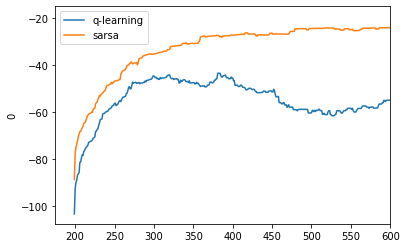

In [17]:
def _plot(histories, labels):
    assert len(histories) == len(labels)
    for h, l in zip(histories, labels):
        data = h.total_rewards
        df = DataFrame(data.T)
        df = pd.concat([df[col] for col in df])
        df = df.rolling(200).mean()
        sns.lineplot(data=df, label=l)
    plt.xlim(175, 600)

_plot([qlearning_history, sarsa_history], ["q-learning", "sarsa"])


We get what we expected: Q-Learning performs
worse than SARSA, as explained in the Example 6.6
in the Sutton & Barto textbook [@sutton_barto_2018].